# NYPD Motor Vehicle Collision Data<a id='Top'></a>

### Overview

The "Motor Vehicle Collisions - Crashes" dataset available through New York City's Open Data program contains information about reported vehicle crashes in NYC. Each row contains details on a single crash event. 

The data contains records from 2012 to today, with data updated on a daily basis. At the time of this writing, there are 1.61 million rows, each row representing a crash event, and 29 columns. 

In this notebook we will analyze this data as follows:

1. [Importing](#Importing)
2. [Understanding](#Understanding)
    - [Column Contents](#column_contents)
    - [Descriptive Statistics](#descriptive_statistics)
    - [Columns Missing Data](#empty)
3. [Transforming](#Transforming)
    - [Dropping Columns](#Drop)
    - [Renaming Data](#Renaming)
    - [Redundant Columns](#Redundant)
    - [Data Types](#data_type)
    - [Categorizing](#categorizing)
4. [Analyzing](#Analyzing)
5. [Statistical Analysis](#statistical_analysis)
6. [Visualizing](#Visualizations)
    - [Number of Deaths by Borough](#Fataities_by_borough) 
    - [Number of Crashes by Hour](#Crashes_by_hour)
    - [Number of Accidents by Season](#accidents_by_season)
    - [Fatal Car Crash Locations](#car_crash_locations)
    - [Contributing Factor Trends](#contributing_factor_trends)
    - [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
    - [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
    - [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
    - [Crash Factor Percentages in Queens](#queens_crash_causes)
7. [End of Document](#Bottom)


* The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

### Importing the Data<a id='Importing'></a>

Let's begin by importing a few libraries we will use later in the notebook, and then bring the first two million rows of NYPD Motor Vehicle Collision Data using pandas. We are over-estimating the number of rows, to leave room for more data if this is run in the future.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [2]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=2000000", low_memory=False)

And let's pull up the data dictionary supplied by the Open Data website for reference.

In [3]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info',  header=1)
data_dict.head()

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN


### Understanding the Data <a id='Understanding'></a>
Let's look at the first few rows of the dataset. 

In [4]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 200) # This returns 200 rows at max to prevent accidents when writing code
datanyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2018-09-20T00:00:00.000,6:40,NaN,NaN,40.691920,-73.978960,POINT (-73.97896 40.69192),ASHLAND PLACE,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,3984399,Motorcycle,Sedan,NaN,NaN,NaN
1,2018-10-09T00:00:00.000,23:25,MANHATTAN,10038,40.707287,-74.004300,POINT (-74.0043 40.707287),NaN,NaN,199 WATER STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3997129,Taxi,Taxi,NaN,NaN,NaN
2,2018-09-28T00:00:00.000,12:40,MANHATTAN,10033,40.849007,-73.941110,POINT (-73.94111 40.849007),CABRINI BOULEVARD,WEST 178 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,3990727,Sedan,Flat Rack,NaN,NaN,NaN
3,2018-10-11T00:00:00.000,18:58,QUEENS,11427,40.730320,-73.744190,POINT (-73.74419 40.73032),HILLSIDE AVENUE,BRADDOCK AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3998081,Sedan,Sedan,NaN,NaN,NaN
4,2018-09-20T00:00:00.000,16:10,QUEENS,11693,40.585050,-73.810814,POINT (-73.810814 40.58505),NaN,NaN,86-00 SHORE FRONT PARKWAY,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Backing Unsafely,NaN,NaN,NaN,3984683,Sedan,Pick-up Truck,NaN,NaN,NaN


... And get overall information about the contents of the data. <a id='column_contents'></a>

In [5]:
pd.options.display.max_info_rows = 5000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618008 entries, 0 to 1618007
Data columns (total 29 columns):
crash_date                       1618008 non-null object
crash_time                       1618008 non-null object
borough                          1126776 non-null object
zip_code                         1126579 non-null object
latitude                         1420654 non-null float64
longitude                        1420654 non-null float64
location                         1420654 non-null object
on_street_name                   1300439 non-null object
off_street_name                  1074461 non-null object
cross_street_name                225404 non-null object
number_of_persons_injured        1617991 non-null float64
number_of_persons_killed         1617977 non-null float64
number_of_pedestrians_injured    1618008 non-null int64
number_of_pedestrians_killed     1618008 non-null int64
number_of_cyclist_injured        1618008 non-null int64
number_of_cyclist_killed        

Each column should contain approxamitely 1.6 million values. There are some columns with considerably fewer entries. Let's find the percentage of the missing values and see which columns have the most amount of missing values. We will get a mean of missing values and then round it to the second decimal.

In [6]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.36
zip_code                         30.37
latitude                         12.20
longitude                        12.20
location                         12.20
on_street_name                   19.63
off_street_name                  33.59
cross_street_name                86.07
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.47
contributing_factor_vehicle_3    93.53
contributing_factor_vehicle_4    98.65
contributing_factor_vehicle_5    99.66
collision_id                      0.00
vehicle_type_code1                0.34
vehicle_type_code2       

Wow! Some columns have a lot of missing values. 

For some it makes sense. `contributing_factor_vehicle_2` or `contributing_factor_vehicle_3` may be missing simply because there were no second or third contributing factors to the collision.  Other than those, for example `borough` column has 30% of its values missing. 

It looks like `contributing_factor_vehicle_3`, `contributing_factor_vehicle_4`, `contributing_factor_vehicle_5` and `vehicle_type_code_3`, `vehicle_type_code_4`, `vehicle_type_code_5` have very few values compared to the others. We will take a closer look at them when we start transforming our data.

For now, we will use the `describe` function to generate some descriptive statistics. This will work on numeric and object series, and may point out any glaring holes in the data. <a id='descriptive_statistics'></a>

In [7]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.420654e+06,1.420654e+06,1.617991e+06,1.617977e+06,1.618008e+06,1.618008e+06,1.618008e+06,1.618008e+06,1.618008e+06,1.618008e+06,1.618008e+06
mean,4.069211e+01,-7.387260e+01,2.627926e-01,1.167507e-03,5.062954e-02,6.316409e-04,2.074773e-02,8.405397e-05,1.915559e-01,4.542623e-04,2.785430e+06
std,1.141132e+00,2.347086e+00,6.601335e-01,3.610199e-02,2.318293e-01,2.570814e-02,1.437003e-01,9.234882e-03,6.224953e-01,2.317054e-02,1.505219e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066880e+01,-7.397720e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.031953e+06
50%,4.072257e+01,-7.392975e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.445130e+06
75%,4.076797e+01,-7.386688e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.849863e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.255234e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns? The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of the empty `latitude` column using the `isnull` function. <a id='empty'></a>

In [8]:
datanyc[datanyc['latitude'].isnull()].head(20)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
18,2018-09-29T00:00:00.000,14:00,NaN,NaN,NaN,NaN,NaN,SPRINGFIELD BOULEVARD,HORACE HARDING EXPRESSWAY,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3990026,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
24,2016-04-06T00:00:00.000,20:10,BRONX,10452,NaN,NaN,NaN,WALTON AVENUE,ROCKWOOD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,NaN,NaN,NaN,NaN,3412322,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
25,2019-12-07T00:00:00.000,10:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4253585,Sedan,Sedan,NaN,NaN,NaN
38,2018-09-17T00:00:00.000,14:14,QUEENS,11378,NaN,NaN,NaN,69 STREET,55 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3983185,Sedan,Sedan,NaN,NaN,NaN
52,2015-01-20T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,3156021,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
77,2018-09-28T00:00:00.000,9:45,NaN,NaN,NaN,NaN,NaN,Dr Theodore Kazimiroff Blvd,Mosholu parkway south,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3989442,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
79,2018-10-10T00:00:00.000,18:40,BRONX,10468,NaN,NaN,NaN,GOULDEN AVENUE,WEST BEDFORD PARK BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3997954,Sedan,Sedan,NaN,NaN,NaN
95,2018-10-03T00:00:00.000,13:00,NaN,NaN,NaN,NaN,NaN,SHORE PARKWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3992867,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
107,2018-09-21T00:00:00.000,15:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3985393,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
130,2018-09-26T00:00:00.000,20:30,NaN,NaN,NaN,NaN,NaN,hoyt ave north,26 street,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,3988640,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we *really* had some time, we would write/find a program to reverse map the `on_street_name` to the other fields.

For now, we'll pivot to take a closer look at vehicle types.

In [9]:
datanyc['vehicle_type_code1'].value_counts().head(20)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  161163
Station Wagon/Sport Utility Vehicle    130790
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16728
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10826
LIVERY VEHICLE                          10481
Box Truck                                8424
Bus                                      6952
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4027
Name: vehicle_type_code1, dtype: int64

In [10]:
datanyc['vehicle_type_code_3'].value_counts().head(20)

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10923
Station Wagon/Sport Utility Vehicle     9053
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     695
Pick-up Truck                            609
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                202
Bus                                      127
Motorcycle                               101
Name: vehicle_type_code_3, dtype: int64

We believe we have a decent understanding of our data. In the next section we will modify the column names to standardize the dataset, deal with missing values, clean duplications, and generally get our dataset to the point where we use it confidently

## Transforming the Data
 <a id='Transforming'></a>
### What needs attention
####  [Dropping Columns](#Drop)
* Some columns (such as `vehicle_type_code_4`, `contributing_factor_vehicle_5`) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. `collision_id`, `on_street_name`, `off_street_name`, `cross_street_name`) so we can drop them completely. 


#### [Renaming Data](#Renaming)
* Cleaning and combining duplicate rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### [Redundant Columns](#Redundant)
* `Latitude` and `longitude` columns seem to be contained in the `location` column. We like keeping the two values separate for now, so we can probably remove `location` later.

#### [Data Types](#data_type)
* The values that we expect to be a 'datetime' type are an 'object' type (`crash_date` and `crash_time` columns). We'll fix those.
* We will change the data type of zip code to string.

#### [Categorizing](#categorizing)
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).

## Dropping Columns  <a id='Drop'></a>
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [11]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [12]:
clean_nyc.drop(columns=["collision_id", "on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what 'clean_nyc' looks like now, as far as data types and number of columns (and values in those columns):

In [13]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618008 entries, 0 to 1618007
Data columns (total 19 columns):
crash_date                       1618008 non-null object
crash_time                       1618008 non-null object
borough                          1126776 non-null object
zip_code                         1126579 non-null object
latitude                         1420654 non-null float64
longitude                        1420654 non-null float64
location                         1420654 non-null object
number_of_persons_injured        1617991 non-null float64
number_of_persons_killed         1617977 non-null float64
number_of_pedestrians_injured    1618008 non-null int64
number_of_pedestrians_killed     1618008 non-null int64
number_of_cyclist_injured        1618008 non-null int64
number_of_cyclist_killed         1618008 non-null int64
number_of_motorist_injured       1618008 non-null int64
number_of_motorist_killed        1618008 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [14]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.36
zip_code                         30.37
latitude                         12.20
longitude                        12.20
location                         12.20
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.47
vehicle_type_code1                0.34
vehicle_type_code2               16.53
dtype: float64

So far, so good.

## Correcting Misspellings and Renaming  <a id='Renaming'></a>

We will modify the column names to standardize the dataset using the rename function.

In [15]:
clean_nyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at `vehicle_type_code_1`.

In [16]:
clean_nyc['vehicle_type_code_1'].value_counts().head(40)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  161163
Station Wagon/Sport Utility Vehicle    130790
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16728
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10826
LIVERY VEHICLE                          10481
Box Truck                                8424
Bus                                      6952
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4027
Tractor Truck Diesel                     3667
Van                               

It looks like there are misspellings and duplicates. Let's see if we can combine some of the obvious misspellings.

In [17]:
clean_nyc['vehicle_type_code_1'].replace('SPORT UTILITY / STATION WAGON', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('TAXI', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Bike', 'BICYCLE', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorscooter', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Moped', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('MOTORCYCLE', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBULANCE', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Refrigerated Van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorbike', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBUL', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CAB', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Cab', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Taxi', 'taxy', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('taxy', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AM', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CONV', 'Convertible', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Garbage or Refuse', 'Dump', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('OTHER', 'UNKNOWN', inplace=True)
clean_nyc['vehicle_type_code_1'].value_counts().head(50)

PASSENGER VEHICLE                 715236
SUV                               444296
Sedan                             161163
taxi                               67399
UNKNOWN                            43911
Pick-up Truck                      33895
Van                                30450
Bus                                21009
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
LIVERY VEHICLE                     10481
BICYCLE                             9595
Motorcycle                          8695
Box Truck                           8427
Ambulance                           4046
Tractor Truck Diesel                3667
TK                                  2485
BU                                  2229
Dump                                2018
Convertible                         1780
FIRE TRUCK                          1061
DS                                  1006
4 dr sedan                           907
PK                                   854
Flat Bed        

Now let's look at `contributing_factor_vehicle_1` and `contributing_factor_vehicle_2`.

In [18]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Unspecified', 'Failure to Yield Right-of-Way',
       'Passing Too Closely', 'Backing Unsafely',
       'Driver Inattention/Distraction', 'Following Too Closely',
       'Unsafe Lane Changing',
       'Traffic Control Device Improper/Non-Working',
       'Turning Improperly', 'Other Vehicular', 'View Obstructed/Limited',
       'Brakes Defective', 'Reaction to Uninvolved Vehicle',
       'Passing or Lane Usage Improper', 'Traffic Control Disregarded',
       'Obstruction/Debris', 'Prescription Medication',
       'Steering Failure', 'Driver Inexperience', 'Pavement Slippery',
       'Oversized Vehicle', 'Fatigued/Drowsy', 'Unsafe Speed', nan,
       'Aggressive Driving/Road Rage', 'Animals Action',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Outside Car Distraction', 'Fell Asleep', 'Alcohol Involvement',
       'Lost Consciousness', 'Passenger Distraction',
       'Failure to Keep Right', 'Driverless/Runaway Vehicle',
       'Accelerator Defective', 

In [19]:
clean_nyc['contributing_factor_vehicle_2'].unique()

array(['Unspecified', 'Backing Unsafely',
       'Driver Inattention/Distraction',
       'Traffic Control Device Improper/Non-Working',
       'Following Too Closely', 'Passing Too Closely', nan,
       'Other Vehicular', 'Reaction to Uninvolved Vehicle',
       'Failure to Yield Right-of-Way', 'Passenger Distraction',
       'Turning Improperly', 'View Obstructed/Limited',
       'Passing or Lane Usage Improper', 'Unsafe Lane Changing',
       'Unsafe Speed', 'Driver Inexperience',
       'Traffic Control Disregarded',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Failure to Keep Right', 'Oversized Vehicle',
       'Lane Marking Improper/Inadequate', 'Outside Car Distraction',
       'Pavement Slippery', 'Aggressive Driving/Road Rage', 'Fell Asleep',
       'Fatigued/Drowsy', 'Headlights Defective', 'Drugs (illegal)',
       'Pavement Defective', 'Other Lighting Defects',
       'Obstruction/Debris', 'Illnes', 'Brakes Defective',
       'Alcohol Involvement'

They have similar factors and there seem to be a lot of unique values. We want to just focus on `contributing_factor_vehicle_1` in this project. Let's do some combining in `contributing_factor_vehicle_1` to make our job easy.

In [20]:
clean_nyc['contributing_factor_vehicle_1'].replace({'Backing Unsafely': 'Traffic Recklessness', 
                                                  'Unsafe Speed': 'Traffic Recklessness', 
                                                 'Passing or Lane Usage Improper': 'Traffic Recklessness',
                                                 'Turning Improperly': 'Traffic Recklessness',
                                                 'Following Too Closely': 'Traffic Recklessness',
                                                 'Passing Too Closely' : 'Traffic Recklessness',
                                                 'Outside Car Distraction': 'Traffic Recklessness',
                                                 'Steering Failure': 'Traffic Recklessness',
                                                 'Reaction to Uninvolved Vehicle': 'Traffic Recklessness',
                                                 'Traffic Control Disregarded': 'Traffic Recklessness',
                                                 'Failure to Yield Right-of-Way': 'Traffic Recklessness',
                                                 'Aggressive Driving/Road Rage': 'Traffic Recklessness',
                                                 'Unsafe Lane Changing': 'Traffic Recklessness',
                                                 'Driver Inexperience': 'Traffic Recklessness',
                                                  
                                                 'Passenger Distraction': 'Driver Inattention/Distraction',
                                                 'Failure to Keep Right': 'Driver Inattention/Distraction',
                                                 'Eating or Drinking': 'Driver Inattention/Distraction',
                                                 'Animals Action': 'Driver Inattention/Distraction',
                                                 'Using On Board Navigation Device': 'Driver Inattention/Distraction',
                                                 'Reaction to Other Uninvolved Vehicle': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hands-free)': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-Held)': 'Driver Inattention/Distraction',
                                                 'Other Electronic Device': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-held)': 'Driver Inattention/Distraction',
                                                 'Texting': 'Driver Inattention/Distraction',
                                                 'Listening/Using Headphones': 'Driver Inattention/Distraction',
                                                 'Fatigued/Drowsy': 'Driver Inattention/Distraction',
                                                 'Fell Asleep': 'Driver Inattention/Distraction',
                                                  
                                                  
                                                 'Brakes Defective': 'Car Defects',
                                                 'Tinted Windows': 'Car Defects',
                                                 'Tire Failure/Inadequate': 'Car Defects',
                                                 'Tow Hitch Defective': 'Car Defects',
                                                 'Headlights Defective': 'Car Defects',
                                                 'Accelerator Defective': 'Car Defects',
                                                 'Windshield Inadequate': 'Car Defects',
                                                 'Driverless/Runaway Vehicle': 'Car Defects',
                                                 'Oversized Vehicle': 'Car Defects',

                                                  
                                                 'Traffic Control Disregarded':'Road Defects',
                                                 'Glare':'Road Defects',
                                                 'Tinted Windows':'Road Defects',
                                                 'Lane Marking Improper/Inadequate': 'Road Defects',
                                                 'View Obstructed/Limited': 'Road Defects',
                                                 'Pavement Defective': 'Road Defects',
                                                 'Other Lighting Defects': 'Road Defects',
                                                 'Obstruction/Debris': 'Road Defects',
                                                 'Traffic Control Device Improper/Non-Working': 'Road Defects',
                                                 'Shoulders Defective/Improper': 'Road Defects',
                                                 'Pavement Slippery': 'Road Defects',
                                                  
                                                 'Illnes': 'Illness',
                                                 'Lost Consciousness': 'Illness',
                                                 'Physical Disability': 'Illness',
                                                 'Prescription Medication': 'Illness',
                                                  
                                                 'Drugs (illegal)': 'Drugs (Illegal)',
                                                 'Alcohol Involvement': 'Drugs (Illegal)',
                                                  
                                                 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Outside Error',
                                                 'Vehicle Vandalism': 'Outside Error',
                                                 'Other Vehicular': 'Outside Error',
                                                  
                                                 }, inplace=True)

In [21]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Unspecified', 'Traffic Recklessness',
       'Driver Inattention/Distraction', 'Road Defects', 'Outside Error',
       'Car Defects', 'Illness', nan, 'Drugs (Illegal)', '80', '1'],
      dtype=object)

I will also drop '80' and '1' since I do not know what they are about. I will also drop the 'nan' and 'unspecified' values, since they carry no information at this point. That can also make it easier to make visualizations later on.

In [22]:
nyc80 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '80' ].index
clean_nyc.drop(nyc80, inplace=True)

nyc1 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '1' ].index
clean_nyc.drop(nyc1, inplace=True)

dropunspecified = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == 'Unspecified' ].index
clean_nyc.drop(dropunspecified, inplace=True)

clean_nyc.dropna(subset = ['contributing_factor_vehicle_1'], how='all', inplace=True)

clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Traffic Recklessness', 'Driver Inattention/Distraction',
       'Road Defects', 'Outside Error', 'Car Defects', 'Illness',
       'Drugs (Illegal)'], dtype=object)

Even in one column we can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined list, to get better data fidelity, and we hope by this point, you can see why.

Next, we will rename some of the columns to make things easier while analyzing the data.

In [23]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
1,2018-10-09T00:00:00.000,23:25,MANHATTAN,10038,40.707287,-74.004300,POINT (-74.0043 40.707287),0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,taxi,Taxi
2,2018-09-28T00:00:00.000,12:40,MANHATTAN,10033,40.849007,-73.941110,POINT (-73.94111 40.849007),0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,Sedan,Flat Rack
3,2018-10-11T00:00:00.000,18:58,QUEENS,11427,40.730320,-73.744190,POINT (-73.74419 40.73032),0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,Sedan,Sedan
4,2018-09-20T00:00:00.000,16:10,QUEENS,11693,40.585050,-73.810814,POINT (-73.810814 40.58505),0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Backing Unsafely,Sedan,Pick-up Truck
5,2018-10-11T00:00:00.000,7:30,NaN,NaN,40.888140,-73.892770,POINT (-73.89277 40.88814),0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,SUV,Sedan


Next, we want to change our values to lowercase letters because having all the values in the same format will make it easier to read and also it can be useful while making analysis (e.g. we can just type the value without thinking whether that value was lower case or upper case letters).

In [24]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
1,2018-10-09t00:00:00.000,23:25,manhattan,10038,40.707287,-74.004300,point (-74.0043 40.707287),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,taxi,taxi
2,2018-09-28t00:00:00.000,12:40,manhattan,10033,40.849007,-73.941110,point (-73.94111 40.849007),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,flat rack
3,2018-10-11t00:00:00.000,18:58,queens,11427,40.730320,-73.744190,point (-73.74419 40.73032),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,sedan
4,2018-09-20t00:00:00.000,16:10,queens,11693,40.585050,-73.810814,point (-73.810814 40.58505),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck
5,2018-10-11t00:00:00.000,7:30,NaN,NaN,40.888140,-73.892770,point (-73.89277 40.88814),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan


## Redundant Columns: 'latitude' and 'longitude' <a id='Redundant'></a>

We suspect the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's check the data dictionary to see whether we can gain some information about it.

In [25]:
data_dict

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN
5,MV-Collisions - Crash,LATITUDE,Latitude coordinate for Global Coordinate Syst...,NaN,NaN
6,MV-Collisions - Crash,LONGITUDE,Longitude coordinate for Global Coordinate Sys...,NaN,NaN
7,MV-Collisions - Crash,LOCATION,"Latitude , Longitude pair",NaN,NaN
8,MV-Collisions - Crash,ON STREET NAME,Street on which the collision occurred,NaN,NaN
9,MV-Collisions - Crash,CROSS STREET NAME,Nearest cross street to the collision,NaN,NaN


When we look at the `LOCATION` column (row 7) we see that it is described as "Latitude , Longitude pair". We are probably right but let's verify it even further.

In [26]:
clean_nyc1[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
1,40.707287,-74.004300,point (-74.0043 40.707287)
2,40.849007,-73.941110,point (-73.94111 40.849007)
3,40.730320,-73.744190,point (-73.74419 40.73032)
4,40.585050,-73.810814,point (-73.810814 40.58505)
5,40.888140,-73.892770,point (-73.89277 40.88814)
6,40.764280,-73.973020,point (-73.97302 40.76428)
8,40.564537,-74.131710,point (-74.13171 40.564537)
9,40.676094,-73.949920,point (-73.94992 40.676094)
10,40.608433,-74.155440,point (-74.15544 40.608433)
11,40.708855,-73.778175,point (-73.778175 40.708855)


Yes, that seems to be right but before we quickly do something we might regret, let's first see if it's true that all the `location` data follows the same pattern we see right now:

In [27]:
clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

False    1020354
Name: location, dtype: int64

1017028 rows where that's not the case! More than we expected! Let's check them out!

In [28]:
clean_nyc1[~clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
1,2018-10-09t00:00:00.000,23:25,manhattan,10038,40.707287,-74.004300,point (-74.0043 40.707287),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,taxi,taxi
2,2018-09-28t00:00:00.000,12:40,manhattan,10033,40.849007,-73.941110,point (-73.94111 40.849007),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,flat rack
3,2018-10-11t00:00:00.000,18:58,queens,11427,40.730320,-73.744190,point (-73.74419 40.73032),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,sedan
4,2018-09-20t00:00:00.000,16:10,queens,11693,40.585050,-73.810814,point (-73.810814 40.58505),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck
5,2018-10-11t00:00:00.000,7:30,NaN,NaN,40.888140,-73.892770,point (-73.89277 40.88814),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan
6,2018-10-12t00:00:00.000,23:45,manhattan,10019,40.764280,-73.973020,point (-73.97302 40.76428),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,sedan,taxi
8,2018-09-17t00:00:00.000,16:00,staten island,10306,40.564537,-74.131710,point (-74.13171 40.564537),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle
9,2018-10-04t00:00:00.000,9:00,NaN,NaN,40.676094,-73.949920,point (-73.94992 40.676094),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,taxi,sedan
10,2018-10-03t00:00:00.000,17:49,NaN,NaN,40.608433,-74.155440,point (-74.15544 40.608433),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,station wagon/sport utility vehicle
11,2018-10-01t00:00:00.000,9:30,NaN,NaN,40.708855,-73.778175,point (-73.778175 40.708855),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,van,station wagon/sport utility vehicle


Ahh those sweet missing values... As we've seen earlier, `latitude`, `longitude` and `location` columns have 12% of their values missing each. So far, as far as we can understand and as the data dictionary points it out, the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's drop the `location` column.

In [29]:
clean_nyc1.drop(columns="location", inplace = True)

Finally, let's take a peek at our data.

In [30]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
1,2018-10-09t00:00:00.000,23:25,manhattan,10038,40.707287,-74.004300,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,taxi,taxi
2,2018-09-28t00:00:00.000,12:40,manhattan,10033,40.849007,-73.941110,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,flat rack
3,2018-10-11t00:00:00.000,18:58,queens,11427,40.730320,-73.744190,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,sedan
4,2018-09-20t00:00:00.000,16:10,queens,11693,40.585050,-73.810814,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck
5,2018-10-11t00:00:00.000,7:30,NaN,NaN,40.888140,-73.892770,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan


## Data Type <a id='data_type'></a>

Let's look at our dates to make sure they are all in the same format:

In [31]:
clean_nyc1[['crash_date', 'crash_time']].head()

,crash_date,crash_time
1,2018-10-09t00:00:00.000,23:25
2,2018-09-28t00:00:00.000,12:40
3,2018-10-11t00:00:00.000,18:58
4,2018-09-20t00:00:00.000,16:10
5,2018-10-11t00:00:00.000,7:30


The `crash_date` column definitely needs some fixing. We will transform the string timestamp for `crash_date` to a true datetime data type.

In [32]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1['crash_date'])
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
1,2018-10-09,23:25,manhattan,10038,40.707287,-74.004300,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,taxi,taxi
2,2018-09-28,12:40,manhattan,10033,40.849007,-73.941110,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,flat rack
3,2018-10-11,18:58,queens,11427,40.730320,-73.744190,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,sedan
4,2018-09-20,16:10,queens,11693,40.585050,-73.810814,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck
5,2018-10-11,7:30,NaN,NaN,40.888140,-73.892770,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called `hour` in which we will only have the hours instead of hours and minutes.

In [33]:
clean_nyc1['crash_time'] = pd.to_datetime(clean_nyc1.crash_time)
clean_nyc1['hour'] = clean_nyc1['crash_time'].dt.hour
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour
1,2018-10-09,2019-12-12 23:25:00,manhattan,10038,40.707287,-74.004300,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,taxi,taxi,23
2,2018-09-28,2019-12-12 12:40:00,manhattan,10033,40.849007,-73.941110,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,flat rack,12
3,2018-10-11,2019-12-12 18:58:00,queens,11427,40.730320,-73.744190,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,sedan,18
4,2018-09-20,2019-12-12 16:10:00,queens,11693,40.585050,-73.810814,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck,16
5,2018-10-11,2019-12-12 07:30:00,NaN,NaN,40.888140,-73.892770,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan,7


We'll also clean up the `zip_code` column, which should have string values, not integer.

In [34]:
clean_nyc1.loc[:,'zip_code'] = clean_nyc1['zip_code'].astype(str)

## Categorizing<a id='categorizing'></a>: Making a Seasons Variable

We are interested in adding a variable that shows the season in which a collision occurred.

In [35]:
clean_nyc1['crash_date'].dt.month.head(30)

1     10
2      9
3     10
4      9
5     10
6     10
8      9
9     10
10    10
11    10
12    10
13     9
14     9
15     9
16     9
17    10
18     9
19    10
20     9
22    10
23    10
24     4
26    10
27     9
28    10
29    10
30    10
31     9
32    10
33    10
Name: crash_date, dtype: int64

In [37]:
def season(crash_date):
    if crash_date.month in ([3, 4, 5]):
        val = 'Spring'
    elif crash_date.month in ([6, 7, 8]):
        val = 'Summer'
    elif crash_date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif crash_date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['crash_date'].apply(season)

In [38]:
clean_nyc1['season'].value_counts()

Autumn    278181
Summer    273570
Spring    246130
Winter    222473
Name: season, dtype: int64

Before we move on to the analysis of our dataset, we would like to take a quick look at the difference our work has made so far.

In [39]:
datanyc.shape

(1618008, 29)

In [40]:
clean_nyc1.shape

(1020354, 20)

We've reduced our data by 9 columns. Let's take a general look at our data as well as the 'info'.

In [41]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
1,2018-10-09,2019-12-12 23:25:00,manhattan,10038,40.707287,-74.004300,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,taxi,taxi,23,Autumn
2,2018-09-28,2019-12-12 12:40:00,manhattan,10033,40.849007,-73.941110,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,flat rack,12,Autumn
3,2018-10-11,2019-12-12 18:58:00,queens,11427,40.730320,-73.744190,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,sedan,18,Autumn
4,2018-09-20,2019-12-12 16:10:00,queens,11693,40.585050,-73.810814,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck,16,Autumn
5,2018-10-11,2019-12-12 07:30:00,NaN,nan,40.888140,-73.892770,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan,7,Autumn


In [42]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020354 entries, 1 to 1618006
Data columns (total 20 columns):
crash_date                       1020354 non-null datetime64[ns]
crash_time                       1020354 non-null datetime64[ns]
borough                          669986 non-null object
zip_code                         1020354 non-null object
latitude                         899476 non-null float64
longitude                        899476 non-null float64
persons_injured                  1020351 non-null float64
persons_killed                   1020342 non-null float64
pedestrians_injured              1020354 non-null int64
pedestrians_killed               1020354 non-null int64
cyclist_injured                  1020354 non-null int64
cyclist_killed                   1020354 non-null int64
motorist_injured                 1020354 non-null int64
motorist_killed                  1020354 non-null int64
contributing_factor_vehicle_1    1020354 non-null object
contributing_factor_v

We've done a lot of data cleaning, and this is a great start for our next stage. If you would like to perform your own analyses, you can use the following cell's code to save the cleaned data locally by removing the `#` mark at the beginning of the line.

In [43]:
# clean_nyc1.to_csv("clean_nyc3_data.csv", index = False)

# Analyzing the data <a id='Analyzing'></a>

Let's see, for example, how many cyclist, pedestrian and motorist killed in 2000000 collisions.

In [44]:
cyclistkillednum = clean_nyc1['cyclist_killed'] > 0
cyclistkillednum.sum()

98

In [45]:
motoristkillednum = clean_nyc1['motorist_killed'] > 0
motoristkillednum.sum()

534

In [46]:
pedestrianskillednum = clean_nyc1['pedestrians_killed'] > 0
pedestrianskillednum.sum()

509

It looks like being a motorist is not very safe in NYC. What about injured people? 

In [47]:
cyclistinjurednum = clean_nyc1['cyclist_injured'] > 0
cyclistinjurednum.sum()

22513

In [48]:
motoristinjurednum = clean_nyc1['motorist_injured'] > 0
motoristinjurednum.sum()

139735

In [49]:
pedestriansinjurednum = clean_nyc1['pedestrians_injured'] > 0
pedestriansinjurednum.sum()

43353

Once again, being a motorist is more dangerous than being a pedestrian or cyclist. 

Let's see which boroughs have a high number of collisions.

In [50]:
clean_nyc1['borough'].value_counts()

brooklyn         191963
queens           184380
manhattan        179246
bronx             86307
staten island     28090
Name: borough, dtype: int64

A lot of collisions in Brooklyn! 

Let's see the common reasons behind collisions.

In [51]:
clean_nyc1.contributing_factor_vehicle_1.value_counts()

traffic recklessness              451751
driver inattention/distraction    367978
road defects                       60758
outside error                      57014
illness                            47246
car defects                        19346
drugs (illegal)                    16261
Name: contributing_factor_vehicle_1, dtype: int64

'Traffic recklessness' and 'driver inattention/distraction' are the main causes of collisions. 

What about the vehicle types? We will first make a copy of data -- a whole new data frame named `contributing_factor` to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [52]:
contributing_factor_inattention = clean_nyc1[clean_nyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor_inattention.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
4,2018-09-20,2019-12-12 16:10:00,queens,11693,40.585050,-73.810814,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,backing unsafely,sedan,pick-up truck,16,Autumn
6,2018-10-12,2019-12-12 23:45:00,manhattan,10019,40.764280,-73.973020,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,sedan,taxi,23,Autumn
9,2018-10-04,2019-12-12 09:00:00,NaN,nan,40.676094,-73.949920,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,taxi,sedan,9,Autumn
10,2018-10-03,2019-12-12 17:49:00,NaN,nan,40.608433,-74.155440,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,station wagon/sport utility vehicle,17,Autumn
12,2018-10-03,2019-12-12 15:00:00,NaN,nan,40.749470,-73.756400,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,carry all,carry all,15,Autumn


Now we can see which vehicles have the 'Driver Inattention' factor most frequently.

In [53]:
contributing_factor_inattention['vehicle_type_code_1'].value_counts().head(30)

passenger vehicle                 152110
suv                               108421
sedan                              42479
taxi                               18226
pick-up truck                       8043
van                                 6514
unknown                             6436
bus                                 4233
small com veh(4 tires)              2920
large com veh(6 or more tires)      2801
livery vehicle                      2714
bicycle                             2505
box truck                           2156
motorcycle                          1454
tractor truck diesel                 762
ambulance                            679
tk                                   601
dump                                 499
convertible                          477
bu                                   474
4 dr sedan                           224
ds                                   207
flat bed                             204
pk                                   154
scooter         

Passenger vehicles take the lead in terms of vehicles most commonly involved in 'driver inattention/distraction' caused collisions. They are followed by SUVs.

# Statistical Analysis <a id='statistical_analysis'></a>

## ANOVA

We will begin by looking at whether there is a difference between the number of deaths by borough for persons, pedestrians, motorists and cyclists. We will use one way ANOVA test for that since we have more than two boroughs (more than two nominal variables).

We will first drop the NaN's in the `persons_killed` column to be able to do the ANOVA test.

In [54]:
from scipy import stats

clean_nyc1.dropna(subset = ['persons_killed'], how='all', inplace=True)

stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([6.18236289]), pvalue=array([5.7031153e-05]))

Our p-value is less than 0.05, which means that it is statistically significant. There seems to be a difference between the number of persons killed by borough.

In [55]:
stats.f_oneway(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([12.3650488]), pvalue=array([4.68448789e-10]))

That is a very low p-value. We are seeing a difference. Our null hypothesis was that all of the boroughs have the same mean for the number of motorists killed in accidents. That null hypothesis is highly unlikely and one or more of these boroughs is different than the others.

In [56]:
stats.f_oneway(clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([1.26869851]), pvalue=array([0.27971007]))

Our p-value is greater than 0.05, which means that it is not statistically significant. There seems to be no difference in the mean number of cyclists killed by borough.

In [57]:
stats.f_oneway(clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([0.73690264]), pvalue=array([0.56663094]))

Our p-value is not less than 0.05. There seems to be no difference in the number of pedestrians killed by borough.

So, there is a difference in the numbers of persons and motorists killed, but there is no difference in the numbers of pedestrians and cyclists  killed by borough.

Let's also see whether there is a difference in the numbers of persons killed by season.

In [58]:
clean_nyc1.season.unique()

array(['Autumn', 'Spring', 'Winter', 'Summer'], dtype=object)

In [59]:
stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['season']=="Autumn"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Spring"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Summer"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Winter"])

F_onewayResult(statistic=array([2.60078152]), pvalue=array([0.05027883]))

That is a very interesting p-value right on the edge! The p-value is very close to being statistically significant but not. This may suggest what we are seeing here in our sample data can't be a real difference but then again, it is very close. We can reject the null hypothesis.

ANOVA can tell there is a difference but can't tell which borough (or boroughs) is different. We need to do some comparisons to see which of the boroughs is an outlier. Let's try two-sample T-tests.

## Two-Sample T-Tests

We will begin by using two-sample T-test to measure whether numbers of motorists killed has a mean that differs between Manhattan and Staten Island. The two-sample T-test assumes that the distribution of values in each group follows a normal distribution ("bell curve"). Let's confirm that this is true for numbers of motorists killed in Manhattan and Staten Island.

In [60]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-7.81103523]), pvalue=array([5.6983593e-15]))

The statistic here represents the distance between the two means, in terms of standard deviations. That is a very small p-value and it is statistically significant. There is a difference between Manhattan and Staten Island. What about Brooklyn and Staten Island?

In [61]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'brooklyn'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-2.9808389]), pvalue=array([0.00287491]))

Our p-value is less than 0.05, so there is a statistically significant difference. We can reject the null hypothesis (our null hypothesis was that the motorists killed means are equal in each borough).

What about Queens and Manhattan?

In [62]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'queens'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'])

Ttest_indResult(statistic=array([5.65229954]), pvalue=array([1.58433389e-08]))

Our p-value is very small this time! There is a little difference... but what about the effect size? Are they really that different? Let's define cohen's d to measure the effect size. Let's look at the effect size for the difference between Manhattan and Queens.

In [63]:
from numpy import var, mean
from math import sqrt
def cohens_d (first, second):
  s1, s2 = var(first, ddof=1), var(second, ddof=1)
  std = sqrt(((len(first) - 1) * s1 + (len(second) - 1) * s2) / (len(first) + len(second) - 2))
  return (mean(first)-  mean(second)) / std

In [64]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"])

motorist_killed   -0.018749
dtype: float64

It looks like the difference is trivial. It is a very small effect size which indicates that the difference between them is not very large.

What about the effect size for Manhattan and Staten Island?

In [65]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"])

motorist_killed   -0.050125
dtype: float64

Again, the difference is trivial. It is a very small effect size which indicates that the difference between them is not statistically significant.

Next, let's see if there are statistically significant differences between the number of fatalities of different vehicle types.

In [66]:
stats.ttest_ind(clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([2.95496512]), pvalue=array([0.00312722]))

It looks like SUV's are more lethal, though not enough to outlaw them. The small p-value is low enough to show that the slight difference is in fact statistically significant, and not a trick of our dataset.

We wonder though: Are SUVs even more dangerous for pedestrians? They are bigger...

In [67]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([4.89899377]), pvalue=array([9.63644964e-07]))

Wow!! It looks like the difference is greater, but the p-value is so small that there is almost no chance that the difference is random!

Let's see if SUVs are significantly different to the largest/broadest set of fatal vehicle types: "passenger vehicle"

In [68]:
stats.ttest_ind(clean_nyc1[['persons_injured']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_injured']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([-0.69413665]), pvalue=array([0.48759674]))

SUVs are slightly, but not significantly more fatal to all people in NYC. Now to check for pedestrians.

In [69]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([3.00644862]), pvalue=array([0.00264328]))

There is a statistically significant difference.

So far, we were able to determine that some vehicles are more dangerous to the lives of New Yorkers than others. We were able to point out the raw numbers, but also prove that they had statistical significance. We also found that strong evidence of how dangerous SUVs are to pedestrians in NYC.

## Chi-Square

Chi-square, or chi-squared, is a measure of independence of categorical variables. Here we will be looking at categories like borough and season. Chi-square requires frequency counts or a contingency table.

In [70]:
contingency_table = pd.crosstab(
    clean_nyc1['borough'], clean_nyc1['season'],
    margins = True)

contingency_table

season,Autumn,Spring,Summer,Winter,All
borough,,,,,
bronx,22774,21267,23177,19088,86306
brooklyn,51269,47039,51168,42484,191960
manhattan,48918,43617,47900,38809,179244
queens,50203,44104,48837,41234,184378
staten island,7337,6622,7171,6959,28089
All,180501,162649,178253,148574,669977


In [71]:
stats.chi2_contingency(contingency_table)

(186.25835216077417,
 5.756025436011303e-29,
 20,
 array([[ 23252.02104848,  20952.33805638,  22962.43515524,
          19139.2057399 ,  86306.        ],
        [ 51716.65887038,  46601.75206015,  51072.56798368,
          42569.0210858 , 191960.        ],
        [ 48290.79392875,  43514.71372301,  47689.36953358,
          39749.12281466, 179244.        ],
        [ 49673.96399876,  44761.08481634,  49055.31329284,
          40887.63789205, 184378.        ],
        [  7567.56215363,   6819.11134412,   7473.31403466,
           6229.01246759,  28089.        ],
        [180501.        , 162649.        , 178253.        ,
         148574.        , 669977.        ]]))

Our chi-square value is 186 and p-value is, well, very small. It is statistically significant. That suggests that the variable season is somehow related to the variable borough. Season did influence the number of accidents in each borough.

Now, we can begin our visualizations...

## Visualizing the data <a id='Visualizations'></a>

We will create an exploratory visualization of:

* [Number of Deaths by Borough](#Fataities_by_borough)
* [Number of Crashes by Hour](#Crashes_by_hour)
* [Number of Accidents by Season](#accidents_by_season)
* [Fatal Car Crash Locations](#car_crash_locations)
* [Contributing Factor Trends](#contributing_factor_trends)
* [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
* [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
* [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
* [Crash Factor Percentages in Queens](#queens_crash_causes)

## Number of deaths by borough <a id='Fataities_by_borough'></a>

Let's see the sum of killed persons by borough.

In [72]:
clean_nyc1.groupby('borough').persons_killed.agg(['sum'])

,sum
borough,
bronx,97.0
brooklyn,247.0
manhattan,140.0
queens,223.0
staten island,44.0


Let's graph the number of deaths by borough with a bar chart.

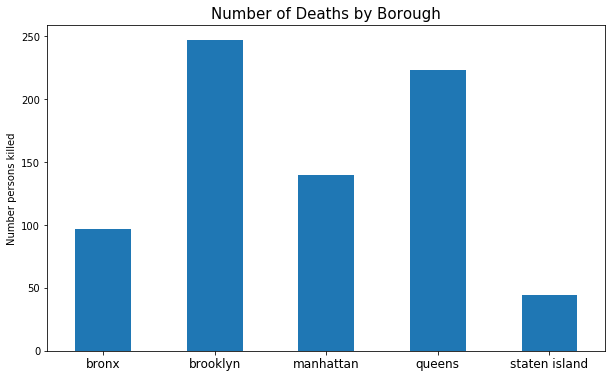

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.sum().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number persons killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

persons_killed1 = clean_nyc1.groupby('borough').persons_killed.sum().reset_index()
persons_killed1 ['sum'] = persons_killed1['persons_killed'].cumsum()

It looks like Brooklyn and Queens have the highest probability of death, meanwhile Staten Island has the lowest. Interesting.

## Number of crashes by hour  <a id='Crashes_by_hour'></a>

Let's see the mean of crashes by hour. We are interested in seeing the percentage rate of crashes for each hour. We want to see this information hourly to get a better general idea. We will use the `persons_killed` column and it will count all the rows with or without deaths or injuries, so we will be able to see the number of crashes by hour.

Text(0.5, 0, 'time')

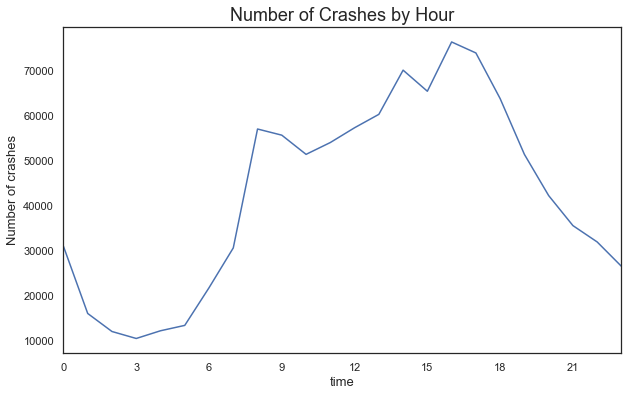

In [100]:
clean_nyc1.groupby(clean_nyc1.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Crashes by Hour', fontsize=18)
plt.ylabel('Number of crashes', fontsize=13)
plt.xticks(np.arange(0, 24, step=3))
plt.xlabel('time', fontsize=13)

It looks like the number of crashes go up between 14:00 and 17:00. They decrease between 2:00 and 7:00, while most people are sleeping.

## Number of accidents by season <a id='accidents_by_season'></a>

Let's see the number of accidents by season.

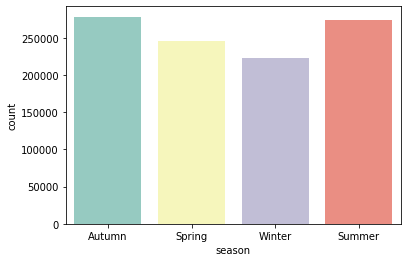

In [75]:
import seaborn as sns
ax = sns.countplot(x='season', data=clean_nyc1, palette='Set3')

Autumn and Summer have higher number of accidents compared to Spring and Winter.

## Fatal Car Crash Locations <a id='car_crash_locations'></a>

We will have to prepare a new dataframe with the latitude and longitude values, before this can work. We'll also include other columns we may want to display in the visualization in some way, shape, or form.

In [76]:
crash_locations = clean_nyc1[['borough', 'crash_date', 'latitude' ,'longitude','persons_killed',
                           'cyclist_killed', 'pedestrians_killed','motorist_killed']].copy()
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
1,manhattan,2018-10-09,40.707287,-74.004300,0.0,0,0,0
2,manhattan,2018-09-28,40.849007,-73.941110,0.0,0,0,0
3,queens,2018-10-11,40.730320,-73.744190,0.0,0,0,0
4,queens,2018-09-20,40.585050,-73.810814,0.0,0,0,0
5,NaN,2018-10-11,40.888140,-73.892770,0.0,0,0,0


The first thing we will do is remove any non-fatal rows. To do so, we must first change the `persons_killed` column values from float to integer. 

In [77]:
crash_locations.dropna(subset = ['persons_killed'], how='all', inplace=True)
crash_locations['persons_killed'] = crash_locations.persons_killed.astype(int)
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
1,manhattan,2018-10-09,40.707287,-74.004300,0,0,0,0
2,manhattan,2018-09-28,40.849007,-73.941110,0,0,0,0
3,queens,2018-10-11,40.730320,-73.744190,0,0,0,0
4,queens,2018-09-20,40.585050,-73.810814,0,0,0,0
5,NaN,2018-10-11,40.888140,-73.892770,0,0,0,0


Much better. Now to drop the rows.

In [78]:
crash_locations = crash_locations[crash_locations.persons_killed != 0].reset_index()
crash_locations.head()

,index,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,1769,NaN,2018-09-30,40.895195,-73.880120,1,0,0,1
1,3730,NaN,2018-10-07,40.713330,-73.842705,1,0,0,1
2,3796,brooklyn,2018-09-21,40.617897,-74.029310,1,0,0,1
3,3990,brooklyn,2018-10-06,40.705470,-73.950240,1,0,0,1
4,4891,manhattan,2018-10-03,40.739880,-73.998720,1,0,1,0


Let's take a look to see if we can clean up this dataframe anymore.

In [79]:
crash_locations.shape

(1133, 9)

In [80]:
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,1.133000e+03,989.000000,989.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,7.797402e+05,40.679122,-73.841011,1.052074,0.087379,0.458959,0.504854
std,4.628044e+05,1.297616,2.352170,0.343963,0.285624,0.534451,0.593861
min,1.769000e+03,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,3.720540e+05,40.659645,-73.966129,1.000000,0.000000,0.000000,0.000000
50%,7.668870e+05,40.717926,-73.917965,1.000000,0.000000,0.000000,0.000000
75%,1.177348e+06,40.774960,-73.858220,1.000000,0.000000,1.000000,1.000000
max,1.617009e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


It looks like we have 1127 rows, and we have missing lat/long values. For our purposes, we will drop those values now. There may be other ways to recover the data, or an approximation thereof, but it is beyond the scope of this notebook.

In [81]:
crash_locations.dropna(subset = ['latitude'], how='all', inplace=True)
crash_locations.dropna(subset = ['longitude'], how='all', inplace=True)
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,9.890000e+02,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,7.606466e+05,40.679122,-73.841011,1.056623,0.086957,0.476239,0.492417
std,4.642084e+05,1.297616,2.352170,0.363893,0.285482,0.540553,0.601275
min,1.769000e+03,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,3.562460e+05,40.659645,-73.966129,1.000000,0.000000,0.000000,0.000000
50%,7.275600e+05,40.717926,-73.917965,1.000000,0.000000,0.000000,0.000000
75%,1.160041e+06,40.774960,-73.858220,1.000000,0.000000,1.000000,1.000000
max,1.617009e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


And finally, we can map these values.

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

import plotly.express as px

fig = px.scatter_mapbox(crash_locations, lat='latitude', lon='longitude',
                        size = "persons_killed",
                        hover_name="persons_killed",
                        hover_data=["pedestrians_killed", "cyclist_killed", "motorist_killed"],
                        color="persons_killed",
                        range_color=[1,8],
                        opacity=0.5,
                        width =850,
                        zoom=9,
                       )
fig.update_layout(title='Fatal Car Crash Locations')
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=286)
fig

This looks pretty scary! These deaths represent pedestrians, cyclists, and motorists. It is hard to find roads where people have not been killed by cars in NYC!

Though we must remember that this map represents deaths over nearly a decade.

## Contributing factor trends <a id='contributing_factor_trends'></a>

We will use Plotly, specifically, `plotly.express` to visualize some contributing factor trends.

In [82]:
clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['traffic recklessness', 'driver inattention/distraction',
       'road defects', 'outside error', 'car defects', 'illness',
       'drugs (illegal)'], dtype=object)

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

import plotly.graph_objects as go
fig = px.box(clean_nyc1, x="persons_killed", y="contributing_factor_vehicle_1")
fig.show()

Most collisions that result in one or two deaths are due to driver inattention, meanwhile most collisions that result in no death are due to illegal drugs.

Let's see when the accidents, in which more than one person die, tend to occur.

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

fig = px.scatter (clean_nyc1, x= 'persons_killed', y= 'hour')
fig.show()

The collisions that result with more than one persons death tend to occur between 22:00 and 04:00.

## Contributing factors to crash fatalities <a id='Factor_Bar_Plot'></a>

We will use the 'value_counts' function to see how frequently contributing factor values appear in the data.

In [83]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

traffic recklessness              451748
driver inattention/distraction    367972
road defects                       60758
outside error                      57013
illness                            47245
car defects                        19345
drugs (illegal)                    16261
Name: contributing_factor_vehicle_1, dtype: int64

For now, we'll just analyze the first contributing factor to get a general sense of the data. Let's look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [84]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
6,traffic recklessness,453.0
1,driver inattention/distraction,289.0
5,road defects,201.0
3,illness,99.0
4,outside error,73.0


Finally, let's drop 0's if we have any.

In [85]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
5,road defects,201.0
3,illness,99.0
4,outside error,73.0
2,drugs (illegal),71.0
0,car defects,6.0


Great. Now let's visualize fatal car crash causes in NYC.

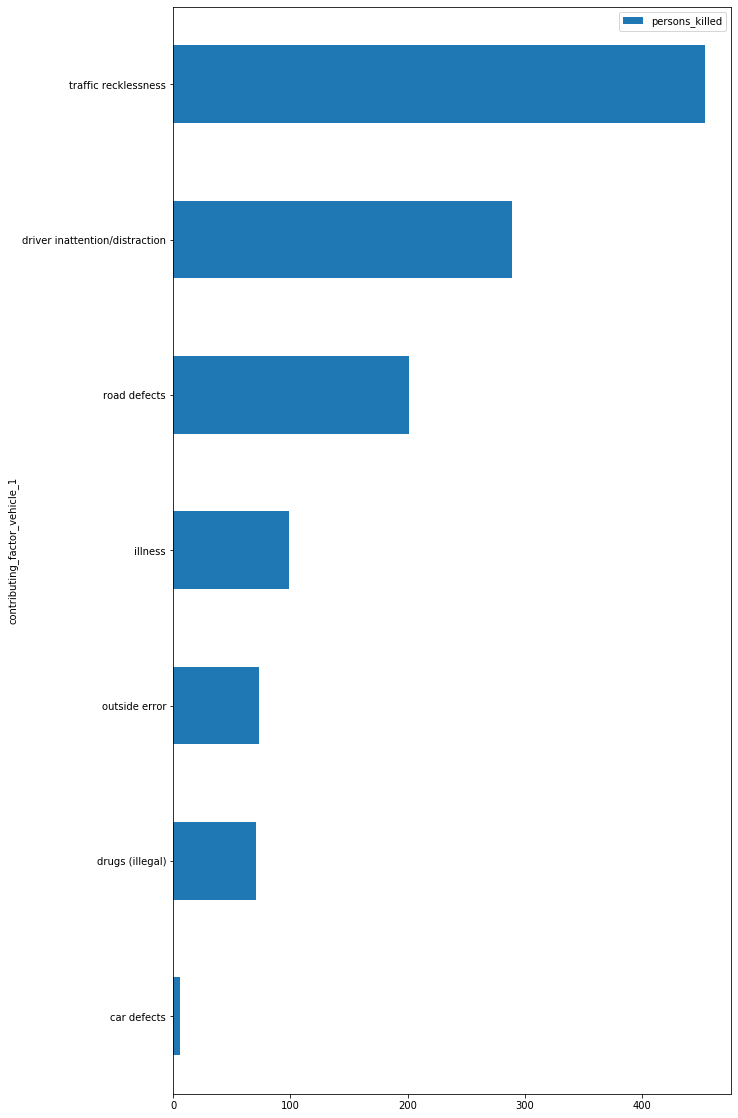

In [86]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by traffic recklessness.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist <a id='Fataity_Grouped_Series'></a>

For this we'll use Seaborn to compare the distribution of fatalities by the category of persons killed. We'll group each category from our original dataframe into its own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [87]:
killed_motorists = clean_nyc1.groupby('crash_date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('crash_date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('crash_date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

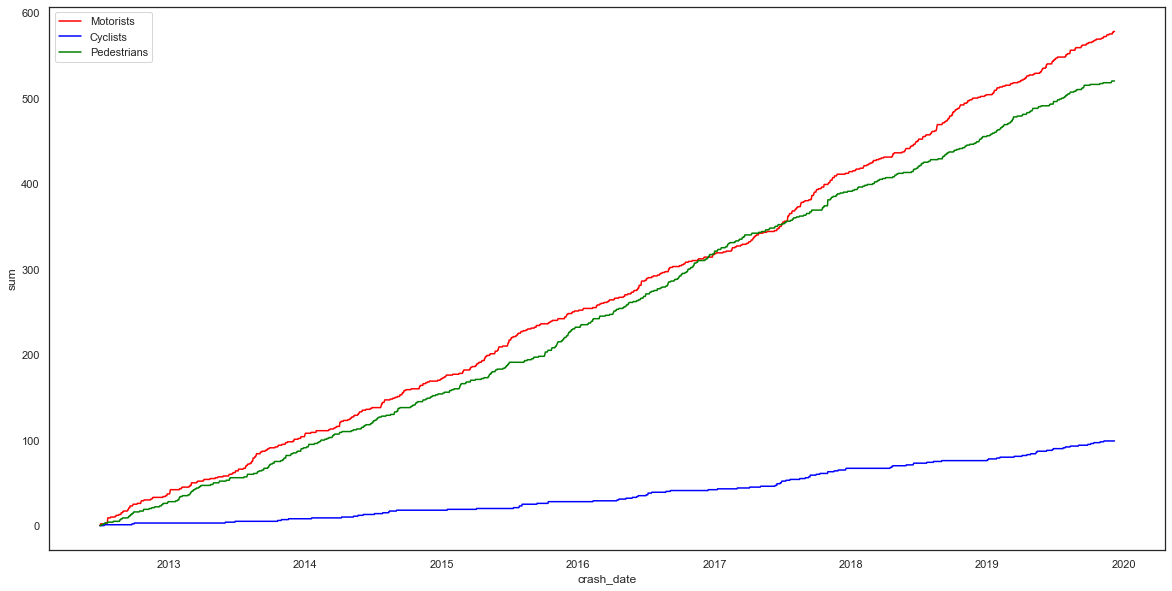

In [99]:
sns.set(style="white")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='crash_date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

## Fatal crash frequency over time <a id='Fatality_Time_Scatterplot'></a>

To visualize the data we need to refine our dataframe. We'll try to sort rows where fatalities occurred into a new dataframe, then we need to group by date and sum.

In [89]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
1769,2018-09-30,2019-12-12 20:19:00,NaN,nan,40.895195,-73.880120,0.0,1.0,0,0,0,0,0,1,driver inattention/distraction,unspecified,sedan,station wagon/sport utility vehicle,20,Autumn
3730,2018-10-07,2019-12-12 16:00:00,NaN,nan,40.713330,-73.842705,0.0,1.0,0,0,0,0,0,1,illness,unspecified,sedan,station wagon/sport utility vehicle,16,Autumn
3796,2018-09-21,2019-12-12 23:22:00,brooklyn,11209,40.617897,-74.029310,0.0,1.0,0,0,0,0,0,1,illness,unspecified,suv,station wagon/sport utility vehicle,23,Autumn
3990,2018-10-06,2019-12-12 13:24:00,brooklyn,11206,40.705470,-73.950240,0.0,1.0,0,0,0,0,0,1,traffic recklessness,unspecified,motorcycle,sedan,13,Autumn
4891,2018-10-03,2019-12-12 10:38:00,manhattan,10011,40.739880,-73.998720,0.0,1.0,0,1,0,0,0,0,traffic recklessness,NaN,pick-up truck,NaN,10,Autumn


Now to group by `crash_date`... We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting chronologically.

Sidenote: We changed the format in the time column, accidentally adding today's date, but that will not have an impact on our analysis.

In [90]:
clean_nyc1.groupby('crash_date').persons_killed.sum().reset_index().head(20)

,crash_date,persons_killed
0,2012-07-01,0.0
1,2012-07-02,1.0
2,2012-07-03,1.0
3,2012-07-04,0.0
4,2012-07-05,1.0
5,2012-07-06,0.0
6,2012-07-07,0.0
7,2012-07-08,0.0
8,2012-07-09,0.0
9,2012-07-10,1.0


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [91]:
counted_lethal_crashes = clean_nyc1.groupby(['crash_date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69739 entries, 0 to 69738
Data columns (total 4 columns):
crash_date                       69739 non-null datetime64[ns]
borough                          69739 non-null object
contributing_factor_vehicle_1    69739 non-null object
persons_killed                   69739 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.1+ MB


Let's visualize it!

[Text(0, 0.5, 'Killed Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Number of people killed by motorists in NYC')]

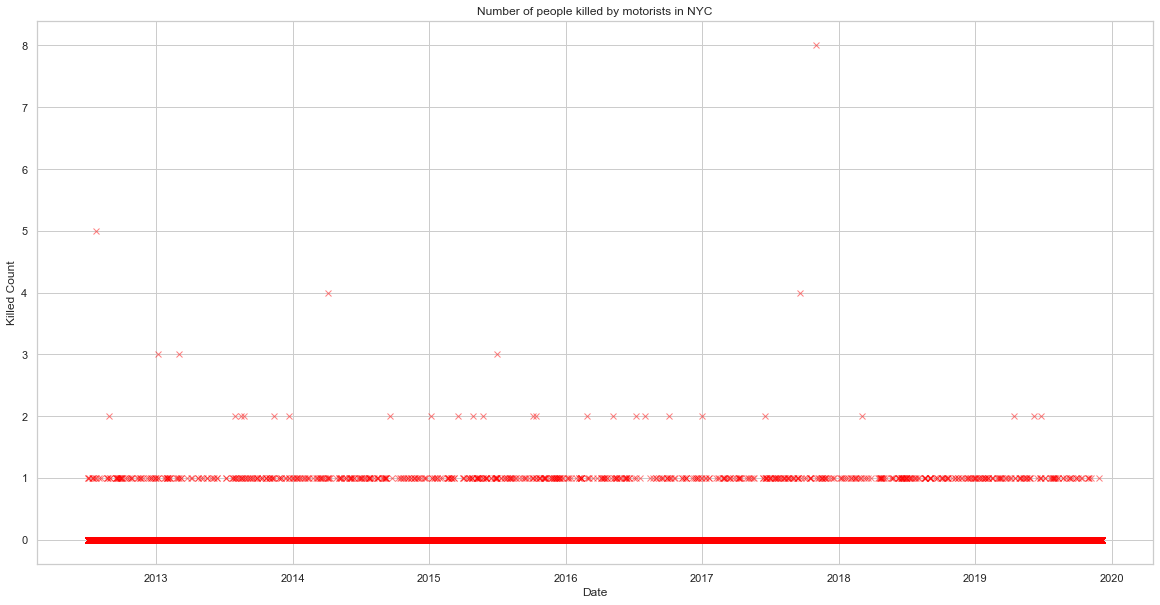

In [92]:
import matplotlib.pyplot as plt
plt.show() #makes graph space appear
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


x = counted_lethal_crashes['crash_date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC") # Set title and labels for axes

We have successfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Crash factor percentages in Queens <a id='queens_crash_causes'></a>

Let's check out our data for boroughs.

In [93]:
top_boroughs = clean_nyc1['borough'].value_counts()
top_boroughs

brooklyn         191960
queens           184378
manhattan        179244
bronx             86306
staten island     28089
Name: borough, dtype: int64

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.


I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first factor involved in the crash. 

In [94]:
borough_factor = clean_nyc1.loc[:, ['borough', 'contributing_factor_vehicle_1']]
queens_data = borough_factor[borough_factor.borough == 'queens']
queens_data.head()

,borough,contributing_factor_vehicle_1
3,queens,traffic recklessness
4,queens,driver inattention/distraction
13,queens,traffic recklessness
34,queens,traffic recklessness
35,queens,traffic recklessness


For this data, what are the numbers for each contributing factor. 

In [95]:
reason_counts = queens_data['contributing_factor_vehicle_1'].value_counts()
reason_counts

traffic recklessness              81404
driver inattention/distraction    69959
road defects                      12185
illness                            8867
outside error                      5575
drugs (illegal)                    3455
car defects                        2933
Name: contributing_factor_vehicle_1, dtype: int64

Now we will find the percentage contribution of each factor for the borough Queens and the first contributing factor involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors. 

In [96]:
total_reason_counts = reason_counts.sum()
total_reason_counts

184378

In [97]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

traffic recklessness              44.150604
driver inattention/distraction    37.943247
road defects                       6.608706
illness                            4.809142
outside error                      3.023680
drugs (illegal)                    1.873868
car defects                        1.590754
Name: contributing_factor_vehicle_1, dtype: float64

The greatest impact to crash was traffic recklessness, which is followed by 'Driver Inattention/Distraction'.

Text(0.5, 1.0, 'Percentage of Factors leading to crashes in Queens')

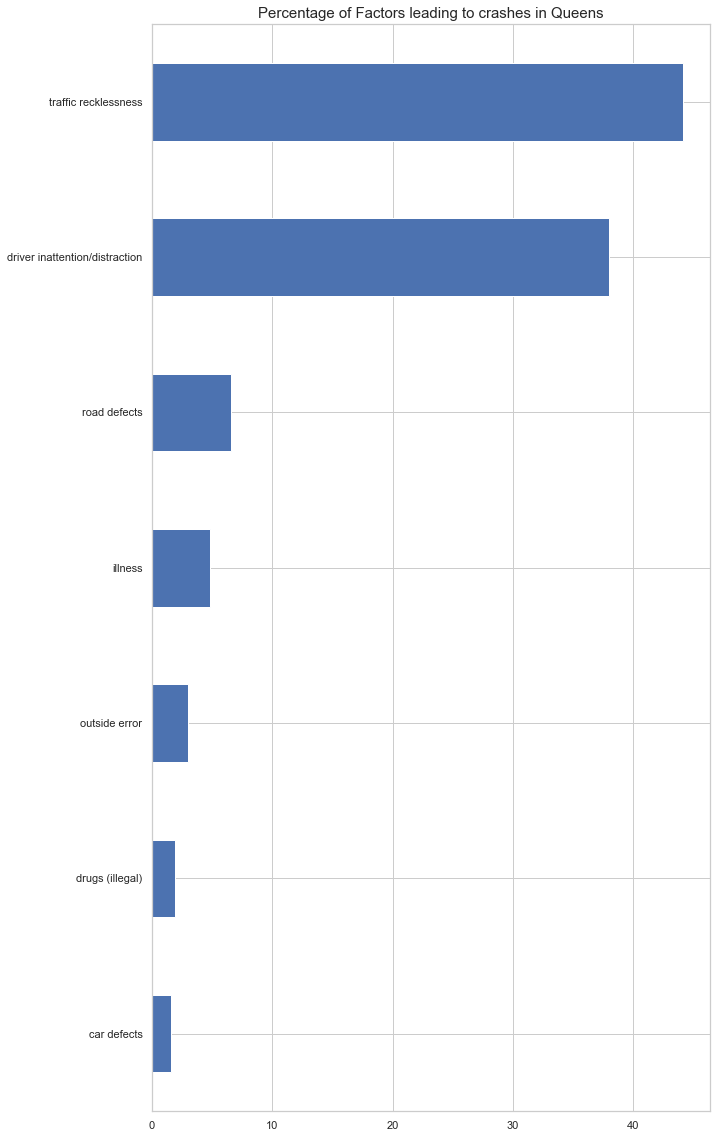

In [98]:
reason_counts1.plot.barh(figsize = (10,20)
                        ).invert_yaxis()
plt.title('Percentage of Factors leading to crashes in Queens', fontsize=15)

# <center> <br>[Beginning of the page](#Top)</center> <a id='Bottom'></a>